In [6]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#!pip install autopep8



In [8]:
from function_library import *



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


In [14]:
df = load_kc_data(filename='kc_house_data.csv')
#Load the dataframe

df = replace_with_year(df, 'date')
#Simplify the date column down to a four digit year stored as an integer.

df = drop_columns(df, ["id"])
#Drop ID because it has no apparent value to our regression model.
#Our index is now the more readable and useful auto generated index 
#counting up by one produced by pandas. 

df = drop_na_rows(df, ["waterfront", "view"])
#Remove certain rows with null values.  This is an 11.29% reduction of our dataset.
#Alternative to this we could chose to fill these values in with zeros. This is 
#something for us to explore more moving forward.


df = convert_columns_with_types(df, "yr_renovated", int, fill_na=True)
#Change year renovated from a float to an integer for consistency

df = replace_values_with_another_column(df, [0], "yr_renovated", "yr_built", replace_na=True)
#If the home has not been renovated we are considering the rennovation date to be 
#date the home was built.


df = drop_rows_with_value(df, 'sqft_basement', '?')
#This is a further 2.17% of our reduced dataset, or 1.9% of the original data set

df = convert_columns_with_function(df, "sqft_basement", pd.to_numeric)
#Converting sqft_basement from a string to a float

df = log_transform_columns(df, ['date', 'price', 'bedrooms', 'bathrooms', 
                                'sqft_living', 'sqft_lot', 'floors', 'view', 
                                'condition', 'grade', 'sqft_above', 'sqft_basement', 
                                'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'],
                           replace_only_when_improved=True, verbose=False)
#This attempts a logarithmic transformation for each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None
       

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:943: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


Not tranformed column: sqft_basement
Tranformed column: yr_built
Tranformed column: yr_renovated
Tranformed column: sqft_living15
Tranformed column: sqft_lot15


In [15]:
#df.index

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24e80748>,
      dtype=object)

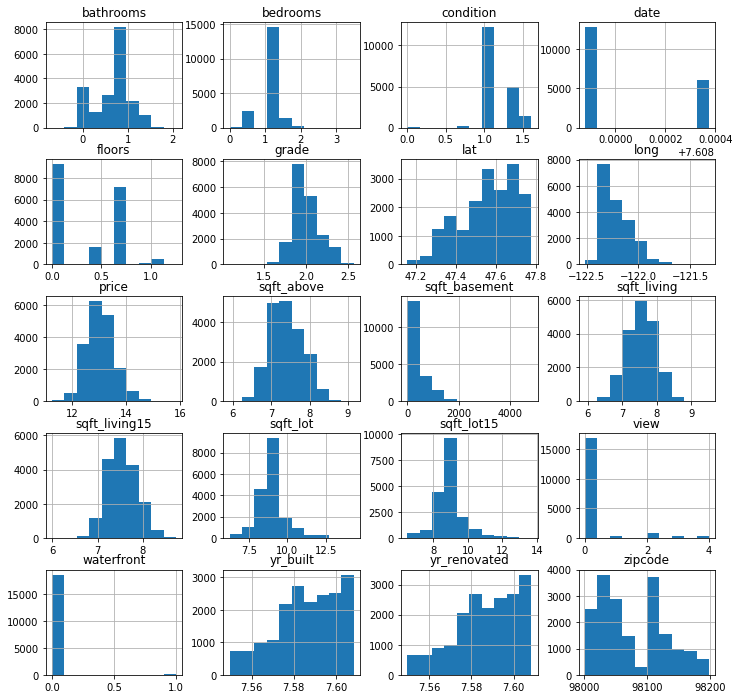

In [16]:
df.hist(figsize=(12,12))

In [17]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [35]:
from function_library import *

the lattitude is length: 8
the longitude is length: 8


In [36]:
location_value_map(df.long.data, df.lat.data, df.price.data, 10)




/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


the lattitude is length: 18749
the longitude is length: 18749


[7.948353667647974,
 7.929942818912408,
 7.9953562899571455,
 7.971092902133485,
 7.989522304829173,
 7.977295584712355,
 8.052897100826614,
 7.928807018736338,
 7.938406823067453,
 7.971511454259045,
 7.975531656116085,
 7.974558717880318,
 8.016831217659824,
 7.949900913101454,
 8.049393809126014,
 7.953689612308091,
 7.944935206279477,
 8.048235698877694,
 8.024615917368765,
 8.057589391831291,
 7.9582000008230604,
 7.936887365511123,
 7.935289334228461,
 7.944348020331424,
 7.975855208416821,
 7.966279342235559,
 7.963653229741508,
 7.9677941829457914,
 7.99977192479319,
 7.93568601412925,
 7.92642177293275,
 7.959663881080984,
 8.046545754836213,
 7.94729154719976,
 8.007160045670133,
 7.960103848820633,
 7.987597551859718,
 8.012513574227041,
 8.07377171353476,
 7.919996942359728,
 7.930926580561717,
 8.055737731239738,
 8.0094061375211,
 7.964269292298007,
 7.971361599511281,
 7.966243126367008,
 7.918665376627034,
 8.035382001817108,
 8.03409997780096,
 7.9429605607920095,
 7.9